<a href="https://colab.research.google.com/github/c04chd03/c04chd03/blob/main/BUSI651_Final_project_David_Espinosa_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libararies**

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

**Load the Data:**
load the CIFAR-10 dataset using the Keras API.

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 6s 0us/step


**Plot Random Images**

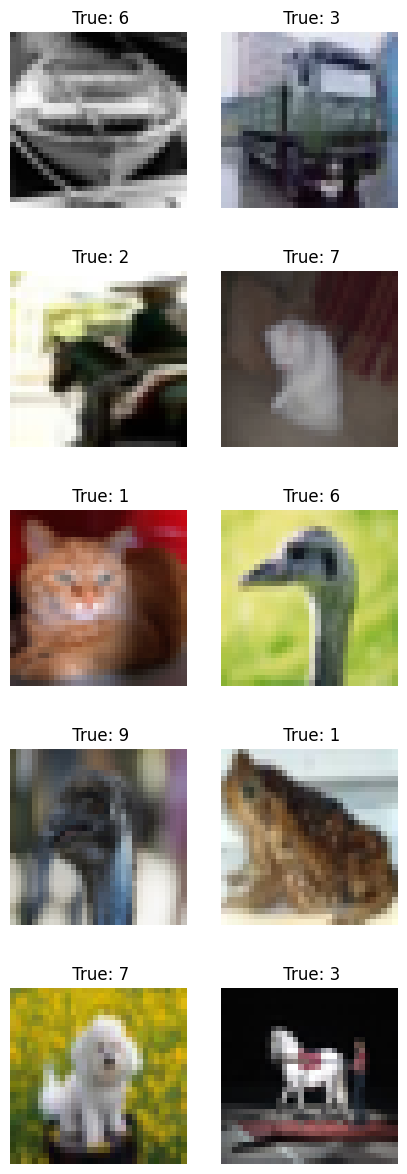

In [4]:
example_indices = np.random.choice(len(test_images), 10, replace=False)

# Plot the example images with their predicted labels
plt.figure(figsize=(5, 15))
for i, example_index in enumerate(example_indices):
    example_image = train_images[example_index]
    true_label = test_labels[example_index][0]
    plt.subplot(5, 2, i+1)
    plt.imshow(example_image)
    plt.axis('off')
    plt.title(f" True: {true_label}")
plt.show()

# **Model Training:**

**Implement the ResNet architecture using Tensorflow.**
Train the ResNet model on the preprocessed CIFAR-10 dataset.

In [5]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.conv1 = layers.Conv2D(64, (3, 3), padding='same', input_shape=train_images.shape[1:])
        self.bn1 = layers.BatchNormalization()
        self.layer1 = tf.keras.Sequential([
            ResidualBlock(64, 64),
            ResidualBlock(64, 64),
            ResidualBlock(64, 64)
        ])
        self.layer2 = tf.keras.Sequential([
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 128),
            ResidualBlock(128, 128)
        ])
        self.layer3 = tf.keras.Sequential([
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 256),
            ResidualBlock(256, 256)
        ])
        self.layer4 = tf.keras.Sequential([
            ResidualBlock(256, 512, stride=2),
            ResidualBlock(512, 512),
            ResidualBlock(512, 512)
        ])
        self.avgpool = layers.GlobalAveragePooling2D()
        self.fc = layers.Dense(num_classes, activation='softmax')
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = layers.ReLU()(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = self.fc(x)
        return x
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = layers.Conv2D(out_channels, (3, 3), strides=stride, padding='same', use_bias=False)
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(out_channels, (3, 3), strides=1, padding='same', use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.shortcut = tf.keras.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = tf.keras.Sequential([
                layers.Conv2D(out_channels, (1, 1), strides=stride, use_bias=False),
                layers.BatchNormalization()
            ])

    def call(self, x):
        residual = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = layers.ReLU()(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x += self.shortcut(residual)
        x = layers.ReLU()(x)
        return x

model = ResNet()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 119s 59ms/step - loss: 1.3199 - accuracy: 0.5267 - val_loss: 1.5388 - val_accuracy: 0.5192
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7956 - accuracy: 0.7217 - val_loss: 1.2090 - val_accuracy: 0.5898
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6061 - accuracy: 0.7897 - val_loss: 0.6331 - val_accuracy: 0.7794
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.4719 - accuracy: 0.8367 - val_loss: 0.6133 - val_accuracy: 0.7934
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.3661 - accuracy: 0.8737 - val_loss: 0.7891 - val_accuracy: 0.7505
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.2759 - accuracy: 0.9039 - val_loss: 0.6539 - val_accuracy: 0.8006
Epoch 7/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.1983 - accuracy: 0.9309 - val_loss: 0.5657 

# **Model Evaluation**

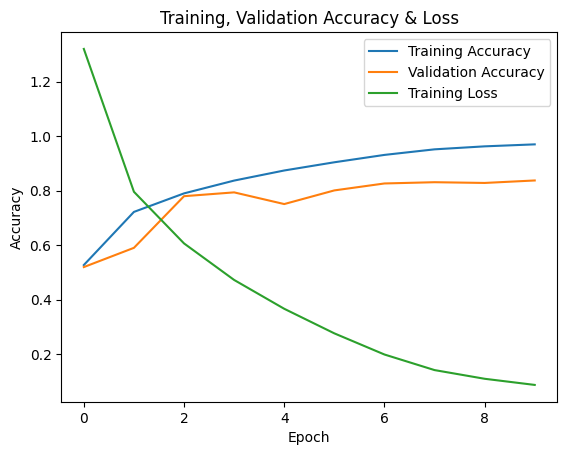

In [21]:
#Question 1) Plot the training and validation accuracy curves over the 10 epochs of training. We Added the Loss
training_accuracy = history.history['accuracy']
plt.plot(training_accuracy, label='Training Accuracy')
training_accuracy = history.history['val_accuracy']
plt.plot(training_accuracy, label='Validation Accuracy')
training_accuracy = history.history['loss']
plt.plot(training_accuracy, label='Training Loss')
plt.title('Training, Validation Accuracy & Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Training Loss'])
plt.show()

Plot the training and validation accuracy curves over the 10 epochs of training.

What is the test accuracy of the ResNet model on the CIFAR-10 dataset.

In [22]:
#Question 4) Calculate the overall test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Compare the final epoch accuracy
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

if final_validation_accuracy >= final_training_accuracy:
    print("The model's ability to generalize is good.")
else:
    print("The model may be overfitting to the training data.")



313/313 [==============================] - 5s 16ms/step - loss: 0.6688 - accuracy: 0.8371
Final Training Accuracy: 0.9696199893951416
Final Validation Accuracy: 0.8371000289916992
The model may be overfitting to the training data.


Plot five random example images from the test set with their predicted labels.

In [12]:
#Show five random images from the test set with their predicted labels.
import numpy as np
y_pred = model.predict(np.reshape(test_images[5], (1,28,28)))
print(y_pred)
test_labels = np.argmax (y_pred)
print(y_label)

ValueError: ignored

In [ ]:
# Compare the final epoch accuracy
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

if final_validation_accuracy >= final_training_accuracy:
    print("The model's ability to generalize is good.")
else:
    print("The model may be overfitting to the training data.")